In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sys
from chembench import dataset

from chembench import load_data
sys.path.append("../train/")
import imp
import get_vec_function_translate
imp.reload(get_vec_function_translate)
from get_vec_function_translate import get_vec6

数据库数据加载

In [5]:
epoch = 'new_trfm_98_10_translate'
model_weight = '../trfm_new_98_10000.pkl'

bbbp = dataset.load_BBBP()
pdbf = dataset.load_PDBF()
pdbr = dataset.load_PDBR()
datasets = [bbbp,pdbf,pdbr]

total samples: 2039
total samples: 9880
total samples: 3040


In [6]:
data = datasets[0]
task_name = data.task_name
task_type = data.task_type
_, induces = load_data(task_name)
smiles = data.x
Y = pd.DataFrame(data.y)

X = get_vec6(smiles,data=task_name,model_weight=model_weight,hidden_size=256,n_head=4,n_layer=2)

import copy
X_ave = X.copy()
i = 0

idx = induces[0]
train_idx, valid_idx, test_idx = idx
X_train = X_ave.loc[train_idx]
X_val = X_ave.loc[valid_idx]
X_test = X_ave.loc[test_idx]

y_train = Y.loc[train_idx]
y_val = Y.loc[valid_idx]
y_test = Y.loc[test_idx]


loading dataset: BBBP number of split times: 3


100%|██████████| 2039/2039 [00:00<00:00, 20651.82it/s]

Built smi corpus file!



100%|██████████| 255/255 [00:00<00:00, 796.44it/s] 


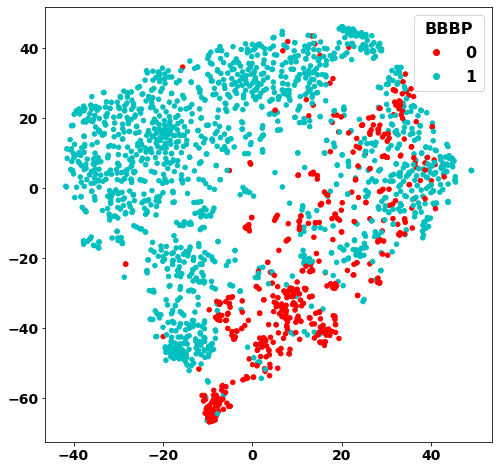

In [9]:
X_tsne = TSNE(n_components=2,random_state=42,perplexity=55).fit_transform(X_ave)
plt.rcParams['font.weight']= 'bold'
from matplotlib.colors import ListedColormap
colours = ListedColormap(['r','c'])
plt.figure(figsize=(8, 8))
scatter=plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y,cmap=colours,label="t-SNE",s=20)
legend1 = plt.legend(*scatter.legend_elements(),loc="upper right", title="BBBP",title_fontsize = 16,fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
data = datasets[1]
task_name = data.task_name
task_type = data.task_type
_, induces = load_data(task_name)
smiles = data.x
Y = pd.DataFrame(data.y)

X = get_vec6(smiles,data=task_name,model_weight=model_weight,hidden_size=256,n_head=4,n_layer=2)
X_ave = X.copy()
i = 0

idx = induces[0]
train_idx, valid_idx, test_idx = idx
X_train = X_ave.loc[train_idx]
X_val = X_ave.loc[valid_idx]
X_test = X_ave.loc[test_idx]

y_train = Y.loc[train_idx]
y_val = Y.loc[valid_idx]
y_test = Y.loc[test_idx]


loading dataset: PDBbind-full number of split times: 1


  0%|          | 0/9880 [00:00<?, ?it/s]

100%|██████████| 9880/9880 [00:00<00:00, 20526.71it/s]


Built smi corpus file!


100%|██████████| 1235/1235 [00:06<00:00, 178.06it/s]


In [12]:
X_tsne1 = TSNE(n_components=2,random_state=49,perplexity=200).fit_transform(X_ave)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


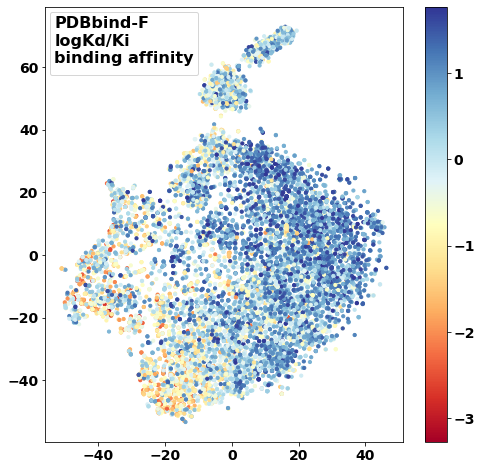

In [14]:
plt.rcParams['font.weight']= 'bold'
cm = plt.cm.get_cmap('RdYlBu') 
plt.figure(figsize=(8, 8))
scatter=plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=Y,cmap=cm,s=10)
legend1 = plt.legend(loc="upper left", title="PDBbind-F\nlogKd/Ki\nbinding affinity",title_fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar().ax.tick_params(labelsize=14)

plt.show()

In [16]:
data = datasets[2]
task_name = data.task_name
task_type = data.task_type
_, induces = load_data(task_name)
smiles = data.x
Y = pd.DataFrame(data.y)

X = get_vec6(smiles,data=task_name,model_weight=model_weight,hidden_size=256,n_head=4,n_layer=2)


X_ave = X.copy()
i = 0

idx = induces[0]
train_idx, valid_idx, test_idx = idx
X_train = X_ave.loc[train_idx]
X_val = X_ave.loc[valid_idx]
X_test = X_ave.loc[test_idx]

y_train = Y.loc[train_idx]
y_val = Y.loc[valid_idx]
y_test = Y.loc[test_idx]


loading dataset: PDBbind-refined number of split times: 1


100%|██████████| 3040/3040 [00:00<00:00, 24385.07it/s]

Built smi corpus file!



100%|██████████| 380/380 [00:00<00:00, 553.00it/s] 


In [19]:
X_tsne2 = TSNE(n_components=2,random_state=2,perplexity=140).fit_transform(X_ave)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


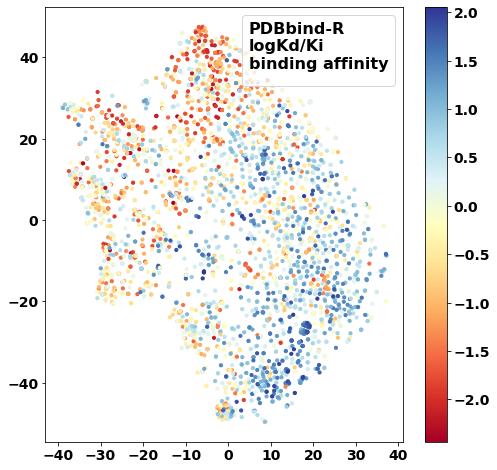

In [20]:
from matplotlib.colors import ListedColormap
cm = plt.cm.get_cmap('RdYlBu') 
plt.figure(figsize=(8, 8))

scatter=plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=Y,cmap=cm,s=10)
legend1 = plt.legend(loc="upper right", title="PDBbind-R\nlogKd/Ki\nbinding affinity",title_fontsize = 16,fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar().ax.tick_params(labelsize=14)
plt.show()